In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd() / "_scripts"))

In [4]:
import seaborn as sns
import seaborn.objects as so
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

from helpers.variable_interfaces import all_variables as vars
from setup.materials_setup import retrieve_cases
from setup.data_wrangle2 import *
from analysis.helpers import map_zone_names, extract_times
from analysis.plot_helpers import set_axis_ticks
# from analysis.dataframes import *
# from analysis.volumes import *
from analysis2.all_cases_v_time import *
sns.set_style("darkgrid")


from experiments.retrieve import retrieve_comparison_groups, retrieve_control_cases

In [5]:
cases = retrieve_control_cases()

In [6]:
df = create_wide_dataframe_for_many_qois_and_cases(cases, [vars.zone.temp["zone_mean_air_temp"]])
df = extract_times(df)
df.head(2)

case_names,space_names,datetimes,Zone Mean Air Temperature [C],time
str,str,datetime[μs],f64,str
"""bol_5_Medium""","""BLOCK 00 STOREY 0""",2017-07-01 00:00:00,19.089994,"""00:00"""
"""bol_5_Medium""","""BLOCK 00 STOREY 0""",2017-07-01 00:15:00,18.163066,"""00:15"""


In [7]:
df_site = create_wide_dataframe_for_many_qois(cases[0], [vars.site.temp["db"], vars.site.solar["direct_rad"]])
df_site = extract_times(df_site)
df_site.head(2)

case_names,space_names,datetimes,Site Outdoor Air Drybulb Temperature [C],Site Direct Solar Radiation Rate per Area [W/m2],time
str,str,datetime[μs],f64,f64,str
"""bol_5_Medium""","""Environment""",2017-07-01 00:00:00,18.65,0.0,"""00:00"""
"""bol_5_Medium""","""Environment""",2017-07-01 00:15:00,17.6,0.0,"""00:15"""


Text(0.5, 0, 'Time')

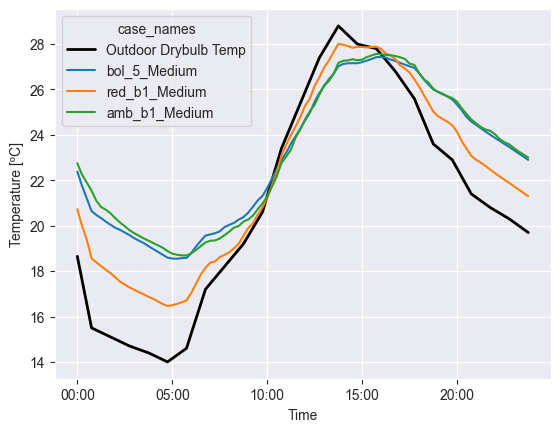

In [10]:
sns.lineplot(data =df_site, y="Site Outdoor Air Drybulb Temperature [C]", x="time", color="black", linewidth=2, label="Outdoor Drybulb Temp")
g = sns.lineplot(df, x="time", y="Zone Mean Air Temperature [C]", hue="case_names", errorbar=None)
set_axis_ticks(g)

g.set_ylabel("Temperature [ºC]")
g.set_xlabel("Time")

# sns.lineplot(data =df_site, y="Site Direct Solar Radiation Rate per Area [W/m2]", x="time", color="grey", linewidth=2, ax=ax2)

<Axes: xlabel='case_names', ylabel='Zone Mean Air Temperature [C]'>

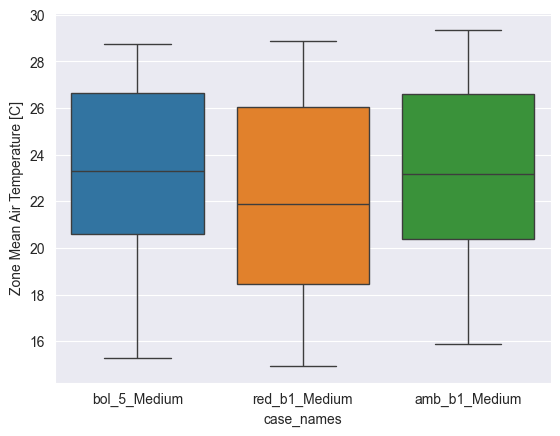

In [10]:
sns.boxplot(data=df, x="case_names", y="Zone Mean Air Temperature [C]", hue="case_names")

In [11]:
df, df_site = create_space_and_site_dfs(cases=cases, space_qois=[vars.afn.zone["vent_vol"], vars.afn.zone["mix_vol"]], site_qois=[vars.site.wind["speed"]])

In [88]:
df.head()

case_names,space_names,datetimes,AFN Zone Ventilation Volume [m3],AFN Zone Mixing Volume [m3],time
str,str,datetime[μs],f64,f64,str
"""Medium_case_amb_b1""","""BLOCK 00 STOREY 0""",2017-07-01 00:00:00,139.572566,49.186094,"""00:00"""
"""Medium_case_amb_b1""","""BLOCK 00 STOREY 0""",2017-07-01 00:15:00,133.131441,78.116121,"""00:15"""
"""Medium_case_amb_b1""","""BLOCK 00 STOREY 0""",2017-07-01 00:30:00,131.106105,99.784593,"""00:30"""
"""Medium_case_amb_b1""","""BLOCK 00 STOREY 0""",2017-07-01 00:45:00,131.266879,124.952069,"""00:45"""
"""Medium_case_amb_b1""","""BLOCK 00 STOREY 0""",2017-07-01 01:00:00,121.510493,116.21619,"""01:00"""


In [89]:
df_site.head()

case_names,space_names,datetimes,Site Wind Speed [m/s],time
str,str,datetime[μs],f64,str
"""Medium_case_amb_b1""","""Environment""",2017-07-01 00:00:00,1.425,"""00:00"""
"""Medium_case_amb_b1""","""Environment""",2017-07-01 00:15:00,1.35,"""00:15"""
"""Medium_case_amb_b1""","""Environment""",2017-07-01 00:30:00,1.275,"""00:30"""
"""Medium_case_amb_b1""","""Environment""",2017-07-01 00:45:00,1.2,"""00:45"""
"""Medium_case_amb_b1""","""Environment""",2017-07-01 01:00:00,1.15,"""01:00"""


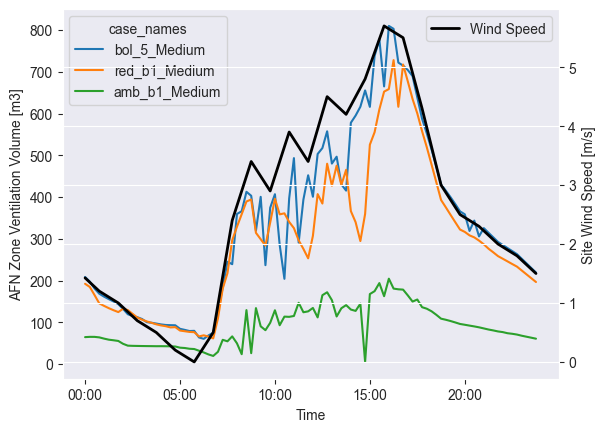

In [12]:
g = sns.lineplot(df, x="time", y="AFN Zone Ventilation Volume [m3]", hue="case_names", errorbar=None)


ax2 = g.twinx()

sns.lineplot(data =df_site, y="Site Wind Speed [m/s]", x="time", color="black", linewidth=2, label="Wind Speed", ax=ax2)
set_axis_ticks(g)
g.set_xlabel("Time")


g.grid(visible=False)

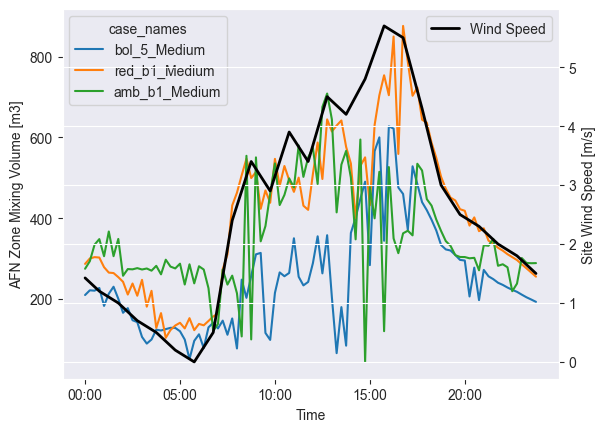

In [20]:
g = sns.lineplot(df, x="time", y="AFN Zone Mixing Volume [m3]", hue="case_names", errorbar=None)

ax2 = g.twinx()

sns.lineplot(data =df_site, y="Site Wind Speed [m/s]", x="time", color="black", linewidth=2, label="Wind Speed", ax=ax2)

set_axis_ticks(g)
g.set_xlabel("Time")


g.grid(visible=False)

<Axes: xlabel='case_names', ylabel='AFN Zone Mixing Volume [m3]'>

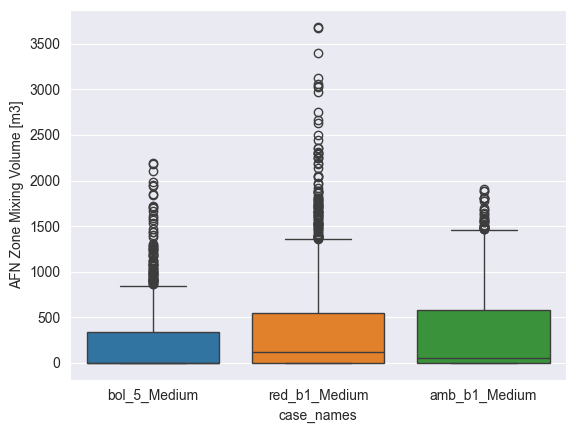

In [19]:
sns.boxplot(data=df, x="case_names", y="AFN Zone Mixing Volume [m3]", hue="case_names")

<Axes: xlabel='case_names', ylabel='AFN Zone Ventilation Volume [m3]'>

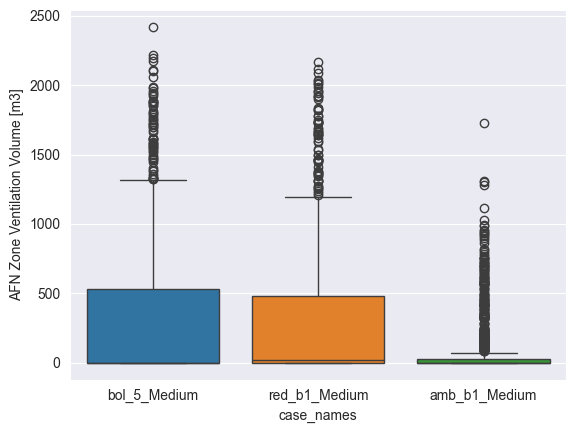

In [18]:
sns.boxplot(data=df, x="case_names", y="AFN Zone Ventilation Volume [m3]", hue="case_names" )

<Axes: xlabel='case_names', ylabel='AFN Zone Ventilation Volume [m3]'>

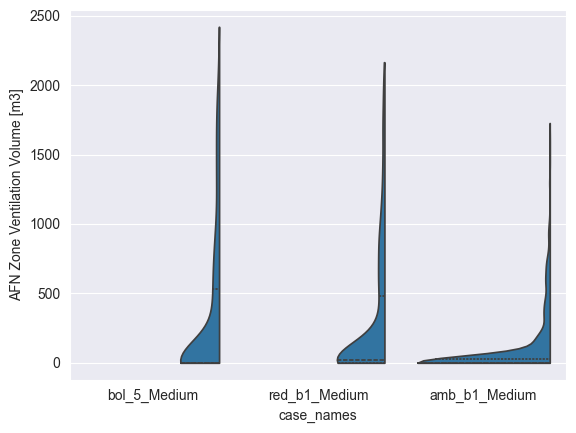

In [16]:
# fig, ax = plt.subplots(figsize=(5,8))
sns.violinplot(data=df, x="case_names", y="AFN Zone Ventilation Volume [m3]",  inner="quart", cut=0, split=True)

<Axes: xlabel='case_names', ylabel='AFN Zone Ventilation Volume [m3]'>

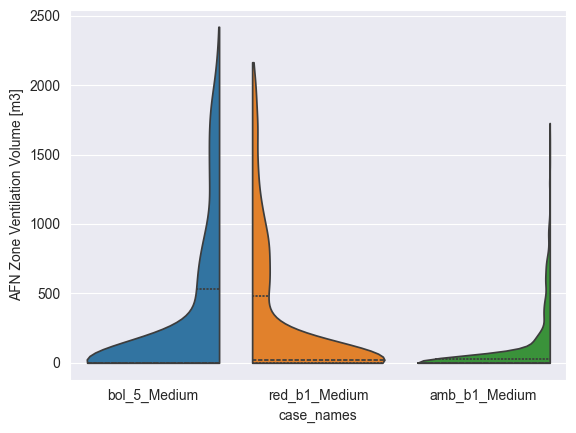

In [17]:
sns.violinplot(data=df, x="case_names", y="AFN Zone Ventilation Volume [m3]",  inner="quart", cut=0, split=True, hue="case_names")